# Baseline model

Here we will train the same model used in our network, but without federated learning. This will give us a good baseline to compare against  

This model is trained on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which consists of 60000 32x32 colour images split into 10 classes. Each class has 6000 images.

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import torch

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [53]:
print(f"Cuda available: {torch.cuda.is_available()}")

try:
    print(f"major and minor cuda capability of the device: {torch.cuda.get_device_capability()}")
except Exception:
    print("No Cuda available")

Cuda available: False
No Cuda available


Create the model

In [54]:
from src.models.simple_cnn import Net, create_model

net = create_model(DEVICE)

We'll load the CIFAR-10 dataset here

In [55]:
from src.utils.dataset import load_CIFAR10

trainloader, testloader = load_CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


Now train the model

Note that we'll train the model for the same number of epochs as rounds are performed in FL

In [56]:
from src.models.simple_cnn import train

epochs = 5
loss_vals = train(net, trainloader, epochs)

<AxesSubplot:>

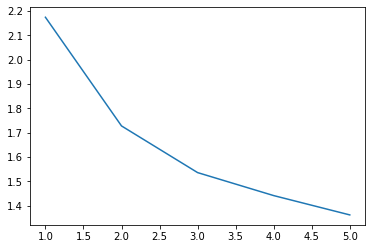

In [57]:
import numpy as np
import seaborn as sns

sns.lineplot(x=np.linspace(1, epochs, epochs), y=loss_vals)

Now we'll evaluate the model

In [58]:
from src.models.simple_cnn import test

loss, accuracy = test(net, testloader)

In [62]:
accuracy

0.5099

In [60]:
from matplotlib import pyplot as plt

cifar_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_predictions(test_loader, model, n=6):
    xs, ys = next(iter(test_loader))
    preds = model(xs).detach()

    _, axs = plt.subplots(1, n, figsize=(24, 8))
    for i in range(n):
        ax = axs[i]
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_xlabel(f"prediction: {cifar_classes[np.argmax(preds[i])]}, actual: {cifar_classes[ys[i]]}")
        ax.imshow(np.transpose(xs[i].reshape((3, 32, 32)), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


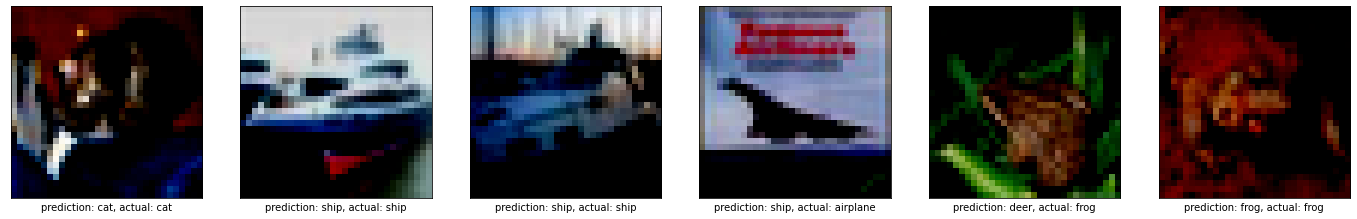

In [61]:
show_predictions(testloader, net)